# Deep Learning (AI302)
# Lab Practical-1
Angela Dutta \
U23AI006

## 1) Introduction of PyTorch Tensors and Basic Operations.

### a) To understand PyTorch tensors, their initialization methods, and data types.

In [ ]:
import torch
print(torch.__version__)

2.9.0+cpu


#### Creating tensors

In [ ]:
# using empty
a = torch.empty(2,3)
print(a)

# using zeros
b = torch.zeros(2,3)
print(b)

# using ones
c = torch.ones(2,3)
print(c)

# using rand (randomly value between 0 and 1)
d = torch.rand(2,3)
print(d)

# using tensor
e = torch.tensor([[1,2,3],[4,5,6]])
print(e)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.2612e-43, 2.8026e-45]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.9964, 0.2453, 0.7675],
        [0.2273, 0.8853, 0.7919]])
tensor([[1, 2, 3],
        [4, 5, 6]])


#### Datatypes

In [ ]:
f = torch.tensor([1.5, 2.5], dtype=torch.float32)
g = torch.tensor([1, 2], dtype=torch.int32)

print(f, f.dtype)
print(g, g.dtype)

tensor([1.5000, 2.5000]) torch.float32
tensor([1, 2], dtype=torch.int32) torch.int32


### b) To perform tensor operations such as arithmetic, broadcasting, indexing, and reshaping.

#### Arithmetic Operations

In [ ]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6], [7, 8]])

print(x + y)
print(x * y)
print(x @ y)

tensor([[ 6,  8],
        [10, 12]])
tensor([[ 5, 12],
        [21, 32]])
tensor([[19, 22],
        [43, 50]])


#### Broadcasting

In [ ]:
z = torch.tensor([10, 20])
print(x + z)

tensor([[11, 22],
        [13, 24]])


#### Indexing

In [ ]:
print(x[0, 1])
print(x[:, 0])

tensor(2)
tensor([1, 3])


#### Reshaping

In [ ]:
x = torch.arange(6)
print(x)
y = x.reshape(2, 3)
print(y)

tensor([0, 1, 2, 3, 4, 5])
tensor([[0, 1, 2],
        [3, 4, 5]])


### c) To explore automatic differentiation using PyTorch’s Autograd system.

In [ ]:
x = torch.tensor(3.0, requires_grad=True)
y = x**2 + 2*x + 1
y.backward()

print("Gradient:", x.grad)

Gradient: tensor(8.)


### 2) Perform all linear algebra operation with Tensorflow.

In [ ]:
import tensorflow as tf

A = tf.constant([[1., 2.], [3., 4.]])
B = tf.constant([[5., 6.], [7., 8.]])

print(tf.add(A, B))
print(tf.matmul(A, B))
print(tf.transpose(A))
print(tf.linalg.det(A))
print(tf.linalg.inv(A))
print(tf.linalg.eig(A))

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 3.]
 [2. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(-2.0, shape=(), dtype=float32)
tf.Tensor(
[[-2.0000002   1.0000001 ]
 [ 1.5000001  -0.50000006]], shape=(2, 2), dtype=float32)
(<tf.Tensor: shape=(2,), dtype=complex64, numpy=array([-0.37228122+0.j,  5.372281  +0.j], dtype=complex64)>, <tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[-0.8245648 +0.j, -0.41597357+0.j],
       [ 0.56576747+0.j, -0.90937674+0.j]], dtype=complex64)>)


### 3) Write a program to implement AND OR gates using Perceptron.

In [ ]:
import numpy as np

def perceptron(x, w, b):
    return 1 if np.dot(x, w) + b >= 0 else 0

X = [(0,0), (0,1), (1,0), (1,1)]

# AND gate
w_and = np.array([1, 1])
b_and = -1.5

print("AND Gate")
for x in X:
    print(x, perceptron(x, w_and, b_and))

# OR gate
w_or = np.array([1, 1])
b_or = -0.5

print("\nOR Gate")
for x in X:
    print(x, perceptron(x, w_or, b_or))

AND Gate
(0, 0) 0
(0, 1) 0
(1, 0) 0
(1, 1) 1

OR Gate
(0, 0) 0
(0, 1) 1
(1, 0) 1
(1, 1) 1


### 4) Implementation of XOR Problem using PyTorch Neural Network.

In [ ]:
import torch
import torch.nn as nn

X = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y = torch.tensor([[0.],[1.],[1.],[0.]])

model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

for epoch in range(5000):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("XOR Output:")
print(y_pred.round())

XOR Output:
tensor([[0.],
        [1.],
        [1.],
        [1.]], grad_fn=<RoundBackward0>)


### 5) Implement Simple below Neural Network to solve regression problem.

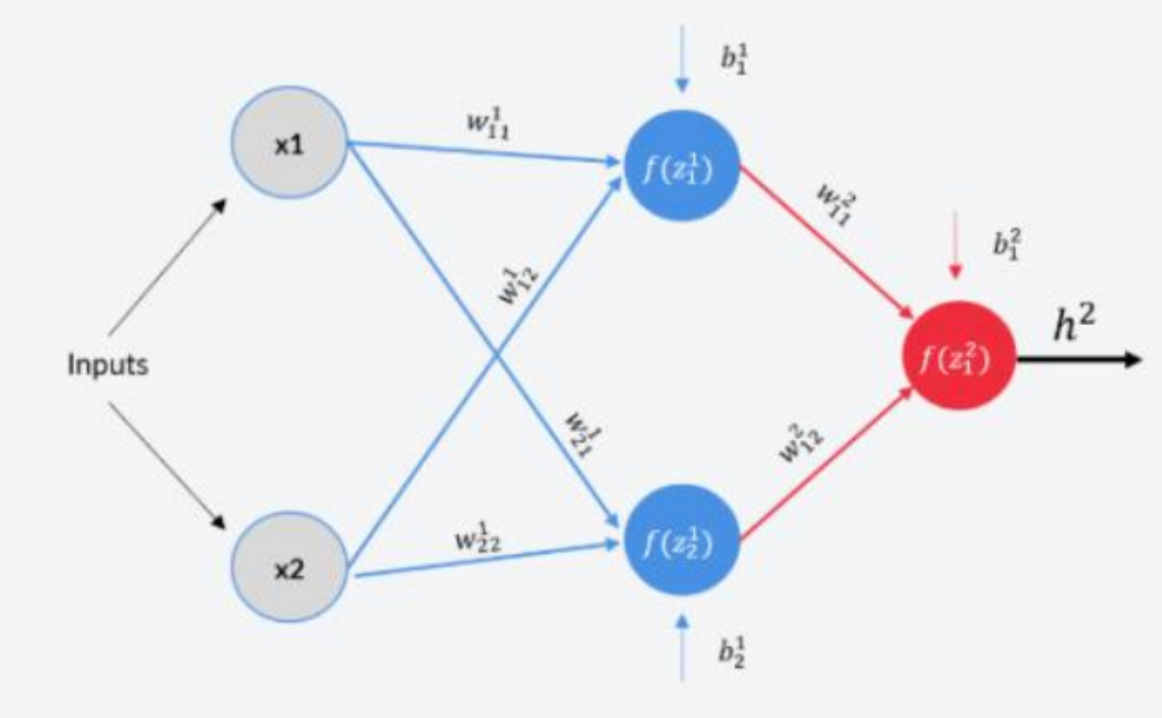

In [ ]:
import torch
import torch.nn as nn

X = torch.randn(100, 2)
y = X[:, 0] * 3 + X[:, 1] * 2 + 1
y = y.view(-1, 1)

class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        return self.output(x)

model = SimpleNN()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("Final Loss:", loss.item())

Final Loss: 0.2120984047651291
